<a href="https://colab.research.google.com/github/ybigsur5/Dicoding-Machine-Learning/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Avira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.pyplot as plt

# Import library untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import library untuk model klasifikasi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Import library untuk evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [8]:
# Memuat dataset hasil clustering
df = pd.read_csv("bank_transactions_data_edited.csv")

# Menampilkan 5 baris pertama untuk memastikan dataset termuat dengan benar
display(df.head())

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
df = df.dropna(subset=['Cluster'])  # Hapus baris yang memiliki NaN pada target

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])  # Menghapus kolom target
y = df['Cluster']  # Kolom target yang akan diprediksi

# Membagi dataset menjadi training dan testing (80% : 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan ukuran data setelah splitting
print(f"Jumlah data latih: {X_train.shape[0]} sampel")
print(f"Jumlah data uji: {X_test.shape[0]} sampel")

Jumlah data latih: 1919 sampel
Jumlah data uji: 480 sampel


In [ ]:
print(X_train.dtypes)

TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration        float64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


In [ ]:
# Konversi kolom datetime ke timestamp
datetime_cols = ['TransactionDate', 'PreviousTransactionDate']
for col in datetime_cols:
    if col in X_train.columns:
        X_train[col] = pd.to_datetime(X_train[col]).astype(int) / 10**9
        X_test[col] = pd.to_datetime(X_test[col]).astype(int) / 10**9

# Konversi fitur kategorikal ke numerik dengan Label Encoding
label_encoders = {}
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

for col in categorical_cols:
    if col in X_train.columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        label_encoders[col] = le  # Simpan encoder jika diperlukan nanti

# Pastikan semua fitur sudah numerik sebelum melatih model
print(X_train.dtypes)

TransactionAmount          float64
TransactionDate            float64
TransactionType              int64
Location                     int64
Channel                      int64
CustomerAge                  int64
CustomerOccupation           int64
TransactionDuration        float64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate    float64
dtype: object


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

#Membangun Model NBC

In [ ]:
# ================== Naïve Bayes Classifier ==================
nb_model = GaussianNB()

start_time = time.time()
nb_model.fit(X_train, y_train)
end_time = time.time()

print(f"Naïve Bayes Training Time: {end_time - start_time:.4f} seconds")

Naïve Bayes Training Time: 0.0062 seconds


**Naive Bayes Classifier** merupakan algoritma berbasis probabilitas yang menggunakan Teorema Bayes sebagai landasan. “Naive” dalam nama algoritma ini merujuk pada asumsi sederhana bahwa semua fitur dianggap independen satu sama lain, meskipun dalam praktiknya asumsi ini jarang terpenuhi secara sempurna.

In [ ]:
# ================== K-Nearest Neighbors (KNN) ==================
knn_model = KNeighborsClassifier(n_neighbors=5)  # k = 5

start_time = time.time()
knn_model.fit(X_train, y_train)
end_time = time.time()

print(f"KNN Training Time: {end_time - start_time:.4f} seconds")

KNN Training Time: 0.0078 seconds


**K-Nearest Neighbor** adalah

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

🔹 Evaluasi Naïve Bayes Classifier:
   - Akurasi    : 50.8333%
   - Precision  : 25.8403%
   - Recall     : 50.8333%
   - F1-Score   : 34.2634%

📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      1.00      0.67       244
         1.0       0.00      0.00      0.00       236

    accuracy                           0.51       480
   macro avg       0.25      0.50      0.34       480
weighted avg       0.26      0.51      0.34       480

--------------------------------------------------


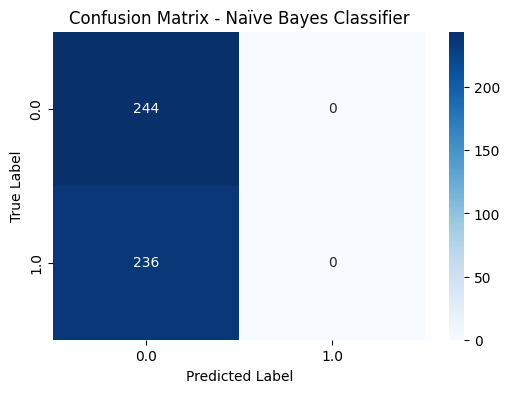

🔹 Evaluasi K-Nearest Neighbor (KNN):
   - Akurasi    : 53.7500%
   - Precision  : 53.7799%
   - Recall     : 53.7500%
   - F1-Score   : 53.7500%

📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.53      0.54       244
         1.0       0.53      0.55      0.54       236

    accuracy                           0.54       480
   macro avg       0.54      0.54      0.54       480
weighted avg       0.54      0.54      0.54       480

--------------------------------------------------


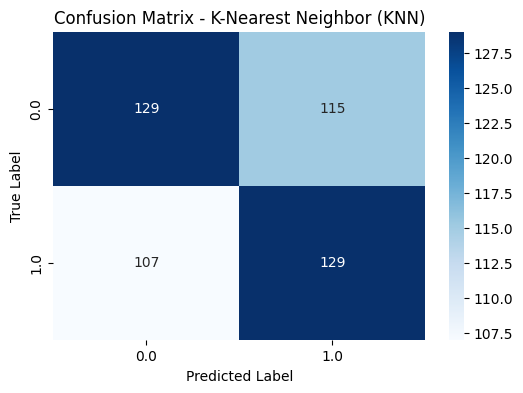

In [ ]:
# Fungsi untuk mengevaluasi model dengan confusion matrix
def evaluate_model_with_confusion_matrix(model, X_test, y_test, model_name="Model"):
    # Prediksi pada data uji
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='weighted') * 100  # Untuk data tidak seimbang
    recall = recall_score(y_test, y_pred, average='weighted') * 100
    f1 = f1_score(y_test, y_pred, average='weighted') * 100

    # Menampilkan hasil evaluasi
    print(f"🔹 Evaluasi {model_name}:")
    print(f"   - Akurasi    : {accuracy:.4f}%")
    print(f"   - Precision  : {precision:.4f}%")
    print(f"   - Recall     : {recall:.4f}%")
    print(f"   - F1-Score   : {f1:.4f}%")
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    # Membuat confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualisasi confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluasi model Naïve Bayes
evaluate_model_with_confusion_matrix(nb_model, X_test, y_test, model_name="Naïve Bayes Classifier")

# Evaluasi model SVM
evaluate_model_with_confusion_matrix(knn_model, X_test, y_test, model_name="K-Nearest Neighbor (KNN)")

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
from sklearn.model_selection import GridSearchCV
# Definisi parameter yang akan diuji
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Inisialisasi model KNN
knn = KNeighborsClassifier()

# GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Output parameter terbaik
print("Best Parameters for KNN:", grid_search_knn.best_params_)

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisi parameter yang akan diuji
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Inisialisasi model Naïve Bayes
nb = GaussianNB()

# GridSearchCV
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

# Output parameter terbaik
print("Best Parameters for Naïve Bayes:", grid_search_nb.best_params_)

Best Parameters for Naïve Bayes: {'var_smoothing': 1e-09}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


🔹 Evaluasi Model KNN Setelah Tuning:
   - Akurasi    : 53.75%
   - Precision  : 53.76%
   - Recall     : 53.75%
   - F1-Score   : 53.75%

🔹 Classification Report - KNN:

              precision    recall  f1-score   support

         0.0       0.55      0.54      0.54       244
         1.0       0.53      0.54      0.53       236

    accuracy                           0.54       480
   macro avg       0.54      0.54      0.54       480
weighted avg       0.54      0.54      0.54       480



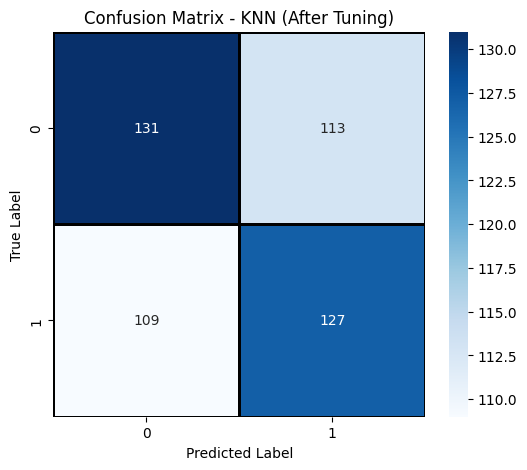

In [ ]:
# Menggunakan model terbaik hasil tuning
best_knn = grid_search_knn.best_estimator_

# Prediksi pada data uji
y_pred_knn = best_knn.predict(X_test)

# Menghitung metrik evaluasi
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
precision_knn = precision_score(y_test, y_pred_knn, average="weighted") * 100
recall_knn = recall_score(y_test, y_pred_knn, average="weighted") * 100
f1_knn = f1_score(y_test, y_pred_knn, average="weighted") * 100

# Menampilkan hasil evaluasi
print(f"\n🔹 Evaluasi Model KNN Setelah Tuning:")
print(f"   - Akurasi    : {accuracy_knn:.2f}%")
print(f"   - Precision  : {precision_knn:.2f}%")
print(f"   - Recall     : {recall_knn:.2f}%")
print(f"   - F1-Score   : {f1_knn:.2f}%\n")

# Menampilkan classification report
print("🔹 Classification Report - KNN:\n")
print(classification_report(y_test, y_pred_knn))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", linewidths=1, linecolor="black")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN (After Tuning)")
plt.show()


🔹 Evaluasi Model Naïve Bayes Setelah Tuning:
   - Akurasi    : 50.83%
   - Precision  : 25.84%
   - Recall     : 50.83%
   - F1-Score   : 34.26%

   - ROC-AUC Score : 50.00%

🔹 Classification Report - Naïve Bayes:

              precision    recall  f1-score   support

         0.0       0.51      1.00      0.67       244
         1.0       0.00      0.00      0.00       236

    accuracy                           0.51       480
   macro avg       0.25      0.50      0.34       480
weighted avg       0.26      0.51      0.34       480



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

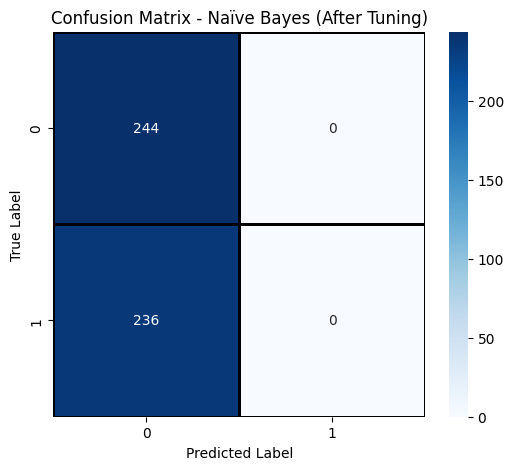

In [ ]:
from sklearn.metrics import roc_auc_score

# Menggunakan model terbaik hasil tuning
best_nb = grid_search_nb.best_estimator_

# Prediksi pada data uji
y_pred_nb = best_nb.predict(X_test)

# Menghitung metrik evaluasi
accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100
precision_nb = precision_score(y_test, y_pred_nb, average="weighted") * 100
recall_nb = recall_score(y_test, y_pred_nb, average="weighted") * 100
f1_nb = f1_score(y_test, y_pred_nb, average="weighted") * 100

# Menampilkan hasil evaluasi
print(f"\n🔹 Evaluasi Model Naïve Bayes Setelah Tuning:")
print(f"   - Akurasi    : {accuracy_nb:.2f}%")
print(f"   - Precision  : {precision_nb:.2f}%")
print(f"   - Recall     : {recall_nb:.2f}%")
print(f"   - F1-Score   : {f1_nb:.2f}%\n")

# Jika dataset memiliki lebih dari 2 kelas, hitung ROC-AUC (opsional)
if len(set(y_test)) == 2:
    roc_auc_nb = roc_auc_score(y_test, y_pred_nb) * 100
    print(f"   - ROC-AUC Score : {roc_auc_nb:.2f}%\n")

# Menampilkan classification report
print("🔹 Classification Report - Naïve Bayes:\n")
print(classification_report(y_test, y_pred_nb))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues", linewidths=1, linecolor="black")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naïve Bayes (After Tuning)")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

# **1. Naïve Bayes (NBC):**

*   Akurasi ~50.83% (Precision & Recall sangat rendah pada kelas 1)
*   Model NBC tampak bias terhadap kelas mayoritas (class imbalance).

# **2. K-Nearest Neighbor (KNN):**

*   Akurasi ~53.75% (Lebih baik dari NBC, tapi masih rendah)
*   Model KNN terlihat lebih seimbang dalam memprediksi kedua kelas dibanding NBC.

# **Identifikasi Kelemahan Model**
📌 Precision & Recall Rendah untuk Kelas Tertentu

- NBC gagal memprediksi kelas 1, menyebabkan Recall = 0.00%.

- KNN lebih baik, tetapi masih memiliki misclassification yang tinggi.

📌 Overfitting atau Underfitting?

NBC cenderung underfitting karena tidak cukup menangkap pola data.

KNN lebih fleksibel, tetapi kemungkinan masih bisa ditingkatkan dengan tuning hyperparameter.

# **Rekomendasi Tindakan Lanjutan**

✅ Gunakan Teknik Resampling (SMOTE atau Undersampling) untuk menangani class imbalance pada NBC.

✅ Hyperparameter Tuning (GridSearchCV/RandomizedSearchCV) pada KNN agar mendapatkan kombinasi terbaik.

✅ Gunakan Feature Engineering untuk menambahkan fitur yang lebih representatif.

✅ Coba Model Alternatif seperti Decision Tree atau Random Forest jika hasil tuning tetap tidak memuaskan.

